## **Workflow**

0. Import importandt libraries
1. Get data ready (turn into tensors)
2. Build A Linear Regression Model
3. Pick A loss function and optimizer
4. Build a training loop
5. Evaulate your model
6. Test Model with a new data point
7. Save the model


In [92]:
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib

In [93]:
# Load data
df = pd.read_csv('dataset.csv')
x = df['YearsExperience'].values.reshape(-1, 1)
y = df['Salary'].values.reshape(-1, 1)

In [94]:
# Normalize data
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_normalized = scaler_x.fit_transform(x)
y_normalized = scaler_y.fit_transform(y)

Spliting the dataset Training and testing

In [95]:
# Save scaler objects
joblib.dump(scaler_x, 'scaler_x.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')

['scaler_y.pkl']

In [96]:
# Convert to tensors
x_tensor = torch.tensor(x_normalized, dtype=torch.float32)
y_tensor = torch.tensor(y_normalized, dtype=torch.float32)


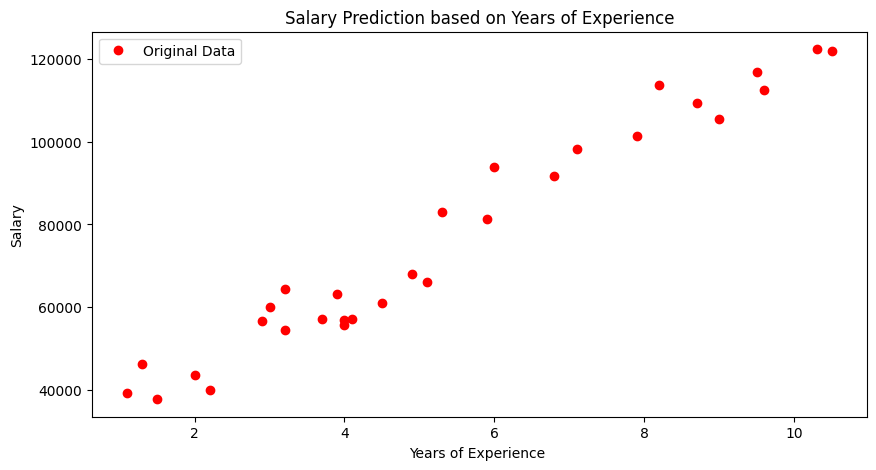

In [97]:
fig=plt.figure(figsize=(10,5))
plt.plot(x,y,'ro',label='Original Data')
plt.xlabel('Years of Experience ')
plt.ylabel('Salary')
plt.legend()
plt.title('Salary Prediction based on Years of Experience')
plt.show()


## **2. Build a linear Regression Model**

In [98]:
# Define model
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)



In [99]:
model = LinearRegression()

## **3. Pick a Loss function and Optimizer**

In [100]:
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.001) #0.0001


## **4. Build a training loop**

In [101]:
# Training
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)  # Adjusted learning rate

num_epochs = 6000

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    out = model(x_tensor)
    loss = criterion(out, y_tensor)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 100 == 0:  # Adjusted logging frequency
        print(f'Epoch: [{epoch + 1}/{num_epochs}], Loss: {loss.item():.6f}')



Epoch: [100/6000], Loss: 2.848561
Epoch: [200/6000], Loss: 1.922885
Epoch: [300/6000], Loss: 1.302634
Epoch: [400/6000], Loss: 0.887034
Epoch: [500/6000], Loss: 0.608561
Epoch: [600/6000], Loss: 0.421969
Epoch: [700/6000], Loss: 0.296943
Epoch: [800/6000], Loss: 0.213169
Epoch: [900/6000], Loss: 0.157037
Epoch: [1000/6000], Loss: 0.119425
Epoch: [1100/6000], Loss: 0.094223
Epoch: [1200/6000], Loss: 0.077336
Epoch: [1300/6000], Loss: 0.066021
Epoch: [1400/6000], Loss: 0.058440
Epoch: [1500/6000], Loss: 0.053360
Epoch: [1600/6000], Loss: 0.049956
Epoch: [1700/6000], Loss: 0.047675
Epoch: [1800/6000], Loss: 0.046147
Epoch: [1900/6000], Loss: 0.045123
Epoch: [2000/6000], Loss: 0.044437
Epoch: [2100/6000], Loss: 0.043977
Epoch: [2200/6000], Loss: 0.043669
Epoch: [2300/6000], Loss: 0.043463
Epoch: [2400/6000], Loss: 0.043324
Epoch: [2500/6000], Loss: 0.043232
Epoch: [2600/6000], Loss: 0.043169
Epoch: [2700/6000], Loss: 0.043128
Epoch: [2800/6000], Loss: 0.043100
Epoch: [2900/6000], Loss: 0.0

## **5. Evaluate the model**

In [102]:
# Evaluation
model.eval()
with torch.no_grad():
    predictions_normalized = model(x_tensor).numpy()
    predictions = scaler_y.inverse_transform(predictions_normalized)  # Inverse transform predictions

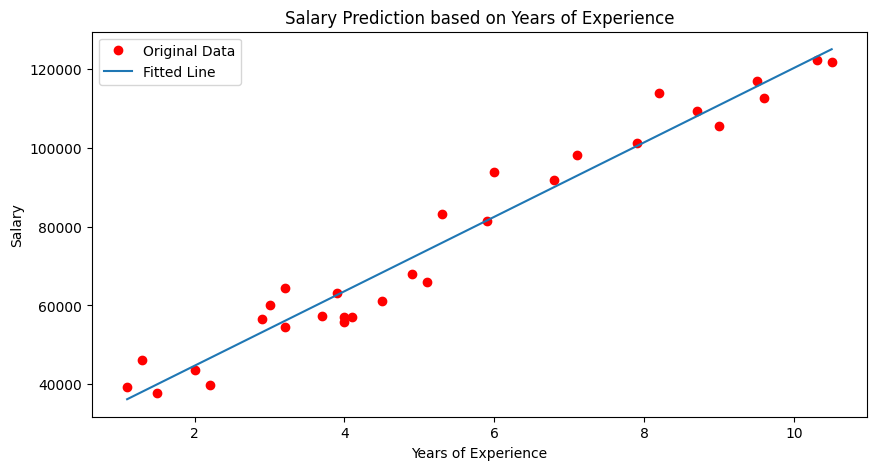

In [103]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'ro', label='Original Data')
plt.plot(x, predictions, label='Fitted Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.title('Salary Prediction based on Years of Experience')
plt.show()

## **6. Test model with new data point**

In [104]:

# Predict for a new yearsExperience value
new_years_experience = 8

In [105]:
# Load scaler objects
scaler_x = joblib.load('scaler_x.pkl')
scaler_y = joblib.load('scaler_y.pkl')

new_years_experience_normalized = scaler_x.transform([[new_years_experience]])
new_years_experience_tensor = torch.tensor(new_years_experience_normalized, dtype=torch.float32)

with torch.no_grad():
    new_salary_normalized = model(new_years_experience_tensor).item()
    new_salary = scaler_y.inverse_transform([[new_salary_normalized]])[0, 0]

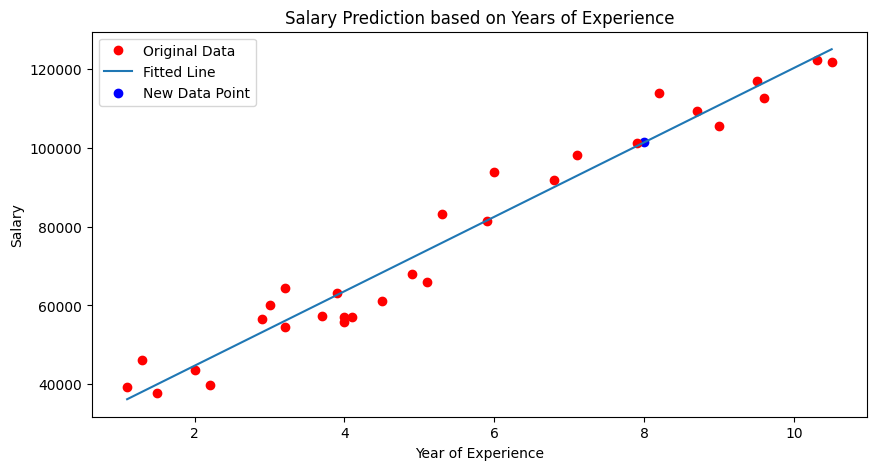

Predicted salary for 8 years of experience is: 101391.39222856081


In [106]:
# Plot the new prediction
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'ro', label='Original Data')
plt.plot(x, predictions, label='Fitted Line')
plt.scatter([new_years_experience], [new_salary], color='blue', label='New Data Point')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.legend()
plt.title('Salary Prediction based on Years of Experience')
plt.show()

# Print the new predicted tip
print(f'Predicted salary for {new_years_experience} years of experience is: {new_salary}')